# Topic : Classification and Prediction of Arrhythmia

## By Deepak Kaura

### E-Mail : kauradeepak26@gmail.com

#### Mobile No. - 9818055526

#### Data Source : Physionet's MIT-BIH Arrhythmia Dataset (https://physionet.org/content/mitdb/1.0.0/)

### Classes:

* Non-ecotic beats (normal beat) ('N'): 0

* Supraventricular ectopic beats ('S'): 1

* Ventricular ectopic beats ('V'): 2

* Fusion Beats ('F'): 3

* Unknown Beats ('Q'): 4

## Import Libraries

In [1]:
random_seed = 1024
import pandas as pd
import numpy as np
np.random.seed(random_seed)
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import resample




# Reading datasets 
        
train_df = pd.read_csv("mitbih_train.csv", header=None)
test_df = pd.read_csv("mitbih_test.csv", header=None)

## Checking both tables of Train and Test

In [2]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Checking the length of both Train and Test datasets

In [4]:
test_df.shape

(21892, 188)

In [5]:
train_df.shape

(87554, 188)

## Merging both datasets

In [6]:
dataset = pd.concat([train_df, test_df], axis=0, sort=True).reset_index(drop=True)

The reason I merged the both datasets : To do Exploratory Data Analysis in Classification way

### After merger let's check our new table and its length

In [7]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
dataset.shape

(109446, 188)

## Checking the basic statistical details like percentile, mean, std etc.

In [9]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,...,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000
mean,0.891170,0.758909,0.424503,0.219602,0.201237,0.210298,0.205607,0.201617,0.198480,0.196610,...,0.004937,0.004568,0.004237,0.003914,0.003673,0.003469,0.003210,0.002956,0.002835,0.473439
std,0.239657,0.221190,0.227561,0.207248,0.177191,0.171965,0.178374,0.177020,0.171469,0.168028,...,0.043951,0.042109,0.040471,0.038801,0.037465,0.036552,0.035015,0.033413,0.032620,1.143232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922252,0.682648,0.251014,0.048853,0.082418,0.088300,0.073171,0.066093,0.064893,0.068615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991202,0.826560,0.430174,0.166355,0.147842,0.158640,0.145078,0.144465,0.150073,0.148849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910868,0.579832,0.342707,0.259045,0.287500,0.298343,0.295235,0.290623,0.283465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# Time for Exploratory Data Analysis : 

In the following code, we separate labels to their actual observations.

In [10]:
labels = dataset.iloc[:, -1].astype('category').map({
    0: 'N - Normal Beat', 
    1: 'S - Supraventricular premature or ectopic beat',
    2: 'V - Premature ventricular contraction', 
    3: 'F - Fusion of ventricular and normal beat', 
    4: 'Q - Unclassified beat'}) 

# since the last column is the category
obs = np.array(dataset.iloc[:, :187]) 

After we separate actual observation and their labels, we will visualize each of the beat classes.

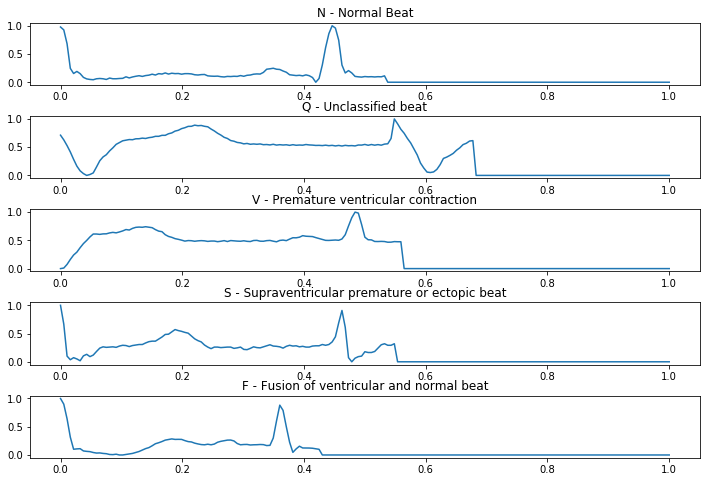

In [11]:
# get the indexes of all labels
n_indexes = labels.index[labels == 'N - Normal Beat']
q_indexes = labels.index[labels == 'Q - Unclassified beat']
v_indexes = labels.index[labels == 'V - Premature ventricular contraction']
s_indexes = labels.index[labels == 'S - Supraventricular premature or ectopic beat']
f_indexes = labels.index[labels == 'F - Fusion of ventricular and normal beat']

# sample one observation per class by indexing the train_labels
n_index = n_indexes[0]
q_index = q_indexes[0]
v_index = v_indexes[0]
s_index = s_indexes[0]
f_index = f_indexes[0]

def generate_subplot(figure, obs, gridspec, row, col, title):
    axis = figure.add_subplot(gridspec[row, col])
    axis.plot(np.linspace(0, 1, 187), obs)
    axis.set_title(title)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace = .5, wspace=.001)
gs = fig.add_gridspec(5,1)

# for N - Normal Beat
generate_subplot(fig, obs[n_index], gs, 0, 0, 'N - Normal Beat')

# for Q - Unclassified beat
generate_subplot(fig, obs[q_index], gs, 1, 0, 'Q - Unclassified beat')

# for V - Premature ventricular contraction
generate_subplot(fig, obs[v_index], gs, 2, 0, 'V - Premature ventricular contraction')

# for S - Supraventricular premature or ectopic beat
generate_subplot(fig, obs[s_index], gs, 3, 0, 'S - Supraventricular premature or ectopic beat')

# F - Fusion of ventricular and normal beat
generate_subplot(fig, obs[f_index], gs, 4, 0, 'F - Fusion of ventricular and normal beat')

plt.show()

Since the dataset has already been downsampled and preprocessed, we will proceed to visualizing the distribution per classification.

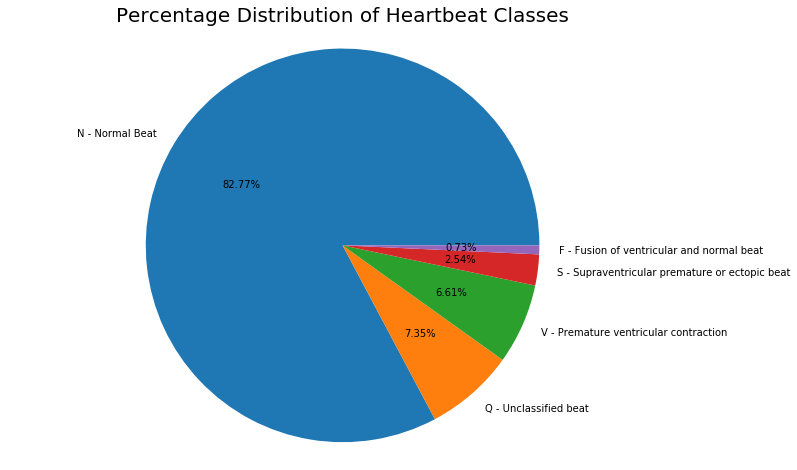

In [12]:
observation_counts = labels.value_counts()
labels_descending = np.array(observation_counts.keys())

fig1, ax1 = plt.subplots()
ax1.pie(observation_counts, labels=labels_descending, autopct='%2.2f%%') #startangle=16, shadow=True)
ax1.axis('equal')
fig1.set_size_inches(12,8)
ax1.set_title("Percentage Distribution of Heartbeat Classes", fontsize=20)
plt.show()

In [13]:
print(observation_counts)

N - Normal Beat                                   90589
Q - Unclassified beat                              8039
V - Premature ventricular contraction              7236
S - Supraventricular premature or ectopic beat     2779
F - Fusion of ventricular and normal beat           803
Name: 187, dtype: int64


As we see, dataset is highly imbalanced. So we need to upsample each classes. This may overfit class F (fusion of ventricular and normal beat b) but its influence to the model will be the same as other classes.

In [14]:
from sklearn.utils import resample
# resample indexes of each class
n_indexes_resampled = resample(n_indexes, replace=True,n_samples=10000,random_state=random_seed)
q_indexes_resampled = resample(q_indexes, replace=True,n_samples=10000,random_state=random_seed)
v_indexes_resampled = resample(v_indexes, replace=True,n_samples=10000,random_state=random_seed)
s_indexes_resampled = resample(s_indexes, replace=True,n_samples=10000,random_state=random_seed)
f_indexes_resampled = resample(f_indexes, replace=True,n_samples=10000,random_state=random_seed)

# initialize the labels_resampled to empty pandas series
labels_resampled = pd.Series([])
obs_resampled = None

# add all indexes_resampled for all classes to iterate
label_indexes_list = [n_indexes_resampled, 
                      q_indexes_resampled, 
                      v_indexes_resampled, 
                      s_indexes_resampled, 
                      f_indexes_resampled]

for label_indexes in label_indexes_list:
    # append labels for all resampled classes
    labels_resampled = labels_resampled.append(labels[label_indexes], ignore_index=True)
    
    # append observations for all resampled classes
    if obs_resampled is None:
        obs_resampled = obs[label_indexes]
    else:
        obs_resampled = np.concatenate((obs_resampled, obs[label_indexes]))

Previously, I resampled all the classes to 10000 observations each. Let us now verify if that is really the case.

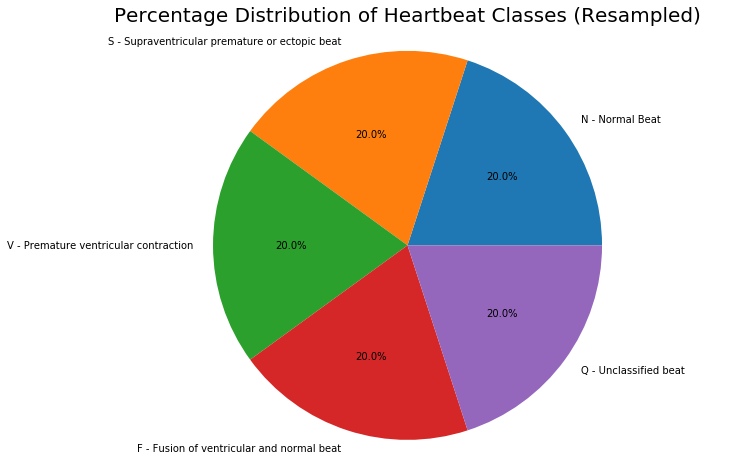

In [15]:
observation_counts = labels_resampled.value_counts()
labels_descending = np.array(observation_counts.keys())

fig1, ax1 = plt.subplots()
ax1.pie(observation_counts, labels=labels_descending, autopct='%1.1f%%')# startangle=0, shadow=True)
ax1.axis('equal')
fig1.set_size_inches(12,8)
ax1.set_title("Percentage Distribution of Heartbeat Classes (Resampled)", fontsize=20)
plt.show()

In [16]:
print(observation_counts)

N - Normal Beat                                   10000
S - Supraventricular premature or ectopic beat    10000
V - Premature ventricular contraction             10000
F - Fusion of ventricular and normal beat         10000
Q - Unclassified beat                             10000
dtype: int64


Now we add a little bit of noise to all observations per class with mean 0 and standard deviation of 0.05. This is necessary especially when we are dealing with repeated cases for classes which originally have too few observations before resampling. Then let us see how each of them respond to the noise through line chart comparison.

In [17]:
from scipy.signal import resample

# first version of adding random noise (Gaussian Noise)
mean = 0
std = 0.05
def add_gaussian_noise(signal):
    noise=np.random.normal(mean, std, 187)
    return (signal + noise)

obs_resampled_with_noise_1 = np.array([add_gaussian_noise(obs) for obs in  obs_resampled])

# second version of adding random noise (Amplify and Stretch)
def stretch(x):
    l = int(187 * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < 187:
        y_ = np.zeros(shape=(187, ))
        y_[:l] = y
    else:
        y_ = y[:187]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

def add_amplify_and_stretch_noise(x):
    result = np.zeros(shape=187)
    if random.random() < 0.33:
        new_y = stretch(x)
    elif random.random() < 0.66:
      new_y = amplify(x)
    else:
        new_y = stretch(x)
        new_y = amplify(new_y)
    return new_y

obs_resampled_with_noise_2 = np.array([add_amplify_and_stretch_noise(obs) for obs in  obs_resampled])

After executing the above code that creates two versions of data augmentation now we proceed to visualizing side-by-side the comparison between the original and both versions of augmented datasets.

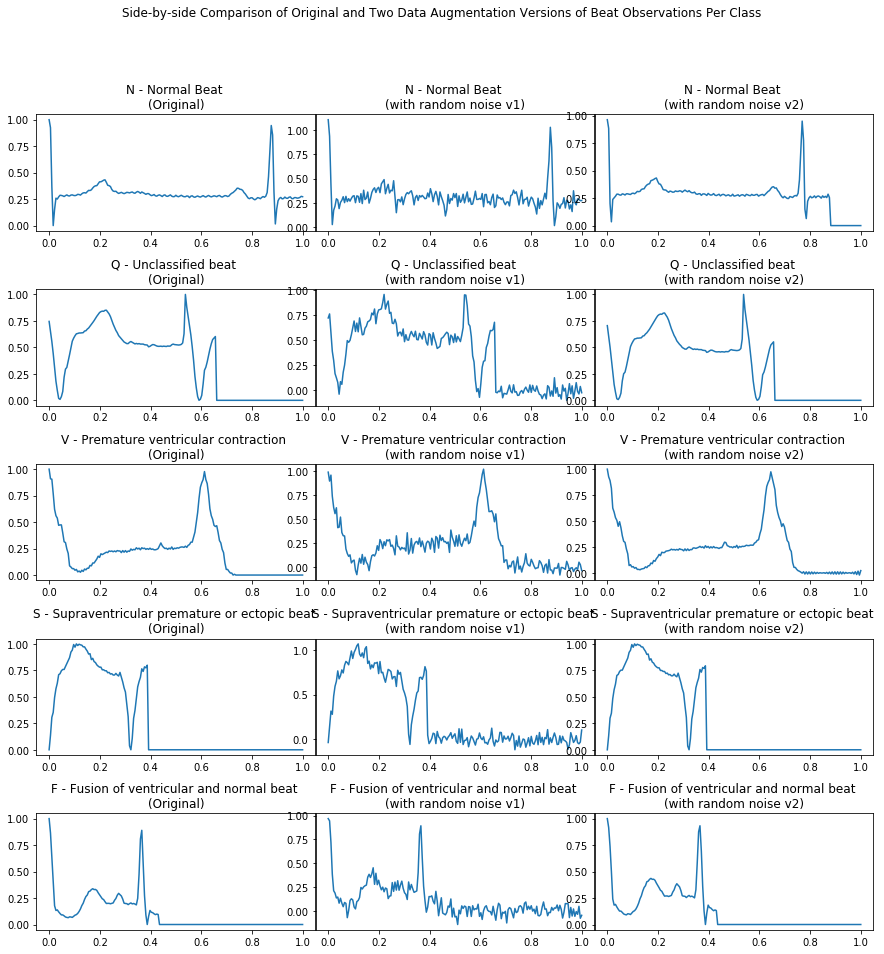

In [18]:
def generate_subplot(figure, obs, gridspec, row, col, title):
    axis = figure.add_subplot(gridspec[row, col])
    axis.plot(np.linspace(0, 1, 187), obs)
    axis.set_title(title)

def generate_plots_for_a_specific_data_augmentation(obs_resampled, obs_resampled_with_noise_1, obs_resampled_with_noise_2):
    # sample one observation per class by indexing the train_labels
    n_index = 0
    q_index = 10000
    v_index = 20000
    s_index = 30000
    f_index = 40000
    
    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    gs = fig.add_gridspec(5, 3)

    # for N - Normal Beat
    generate_subplot(fig, obs_resampled[n_index], gs, 0, 0, 'N - Normal Beat \n(Original)')
    generate_subplot(fig, obs_resampled_with_noise_1[n_index], gs, 0, 1, 'N - Normal Beat \n(with random noise v1)')
    generate_subplot(fig, obs_resampled_with_noise_2[n_index], gs, 0, 2, 'N - Normal Beat \n(with random noise v2)')

    # for Q - Unclassified beat
    generate_subplot(fig, obs_resampled[q_index], gs, 1, 0, 'Q - Unclassified beat \n(Original)')
    generate_subplot(fig, obs_resampled_with_noise_1[q_index], gs, 1, 1, 'Q - Unclassified beat \n(with random noise v1)')
    generate_subplot(fig, obs_resampled_with_noise_2[q_index], gs, 1, 2, 'Q - Unclassified beat \n(with random noise v2)')

    # for V - Premature ventricular contraction
    generate_subplot(fig, obs_resampled[v_index], gs, 2, 0, 'V - Premature ventricular contraction \n(Original)')
    generate_subplot(fig, obs_resampled_with_noise_1[v_index], gs, 2, 1, 'V - Premature ventricular contraction \n(with random noise v1)')
    generate_subplot(fig, obs_resampled_with_noise_2[v_index], gs, 2, 2, 'V - Premature ventricular contraction \n(with random noise v2)')

    # for S - Supraventricular premature or ectopic beat
    generate_subplot(fig, obs_resampled[s_index], gs, 3, 0, 'S - Supraventricular premature or ectopic beat \n(Original)')
    generate_subplot(fig, obs_resampled_with_noise_1[s_index], gs, 3, 1, 'S - Supraventricular premature or ectopic beat \n(with random noise v1)')
    generate_subplot(fig, obs_resampled_with_noise_2[s_index], gs, 3, 2, 'S - Supraventricular premature or ectopic beat \n(with random noise v2)')

    # F - Fusion of ventricular and normal beat
    generate_subplot(fig, obs_resampled[f_index], gs, 4, 0, 'F - Fusion of ventricular and normal beat \n(Original)')
    generate_subplot(fig, obs_resampled_with_noise_1[f_index], gs, 4, 1, 'F - Fusion of ventricular and normal beat \n(with random noise v1)')
    generate_subplot(fig, obs_resampled_with_noise_2[f_index], gs, 4, 2, 'F - Fusion of ventricular and normal beat \n(with random noise v2)')

    plt.suptitle('Side-by-side Comparison of Original and Two Data Augmentation Versions of Beat Observations Per Class')
    plt.show()
    
generate_plots_for_a_specific_data_augmentation(obs_resampled, obs_resampled_with_noise_1, obs_resampled_with_noise_2)

Noow that we generated a significant amount of observations, let us now split the dataset to train, test and validation. The following divides the dataset 80/20 where the former is for training and the latter is for the test.

# Building Models : -

### Random Forest :

In [19]:
target_test=test_df[187]
#y_train=to_categorical(target_train)
#y_test=to_categorical(target_test)
y_train = train_df.loc[:,train_df.columns==187]
y_test = test_df.loc[:,test_df.columns==187]
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values

In [20]:
from sklearn.ensemble import RandomForestClassifier


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,criterion="gini",max_depth= None)

#Train the model using the training sets y_pred=clf.predict(X_test)
history = clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [21]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9746939521286314


In [22]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_test)

y_pred  = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Accuracy: 97.47%
Mean Absolute Error : 0.04892198063219441


### SVM :

From above, few steps here repeated in a new way 

In [23]:
c0 = train_df[train_df[187] == 0].sample(1000)
c1 = train_df[train_df[187] == 1].sample(1000)
c2 = train_df[train_df[187] == 2].sample(1000)
c3 = train_df[train_df[187] == 3]
c4 = train_df[train_df[187] == 4].sample(1000)

In [24]:
new_data = pd.concat([c0, c1, c2, c3, c4])

In [25]:
new_data[187].value_counts()
new_data.shape
new_data = np.array(new_data)

In [26]:
X = new_data[:, : 187]
Y = new_data[:, 187]

In [27]:
print(X.shape)
print(Y.shape)

(4641, 187)
(4641,)


In [28]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', probability=True)
clf = svm.fit(X,Y)

In [29]:
test_df = np.array(test_df)
X_test = test_df[:, :187]
Y_test = test_df[:, 187]

In [30]:
clf.score(X_test, Y_test)

0.8449661976977891

### XGBoost :

In [31]:
train_df = pd.read_csv("mitbih_train.csv", header=None)
test_df = pd.read_csv("mitbih_test.csv", header=None)
train_df.to_numpy()
test_df.to_numpy()

array([[1.        , 0.75826448, 0.11157025, ..., 0.        , 0.        ,
        0.        ],
       [0.90842491, 0.7838828 , 0.53113556, ..., 0.        , 0.        ,
        0.        ],
       [0.73008847, 0.21238938, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.96735907, 0.62017804, ..., 0.        , 0.        ,
        4.        ],
       [0.98412699, 0.5674603 , 0.60714287, ..., 0.        , 0.        ,
        4.        ],
       [0.97396964, 0.91323209, 0.86550975, ..., 0.        , 0.        ,
        4.        ]])

In [32]:
from sklearn.model_selection import train_test_split
x = train_df.loc[:,train_df.columns!=187]

y = train_df.loc[:,train_df.columns==187]

train_x, test_x, train_y, test_y = train_test_split(x.to_numpy(), y.to_numpy(), test_size = 0.25)

In [33]:
from xgboost import XGBClassifier
my_model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10,
                      n_jobs=5)
my_model.fit(train_x,train_y,verbose= False)

[12:05:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=5, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.3,
              reg_lambda=1, scale_pos_weight=1, silent=False, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
from sklearn.metrics import accuracy_score
predictions = my_model.predict(test_x)

y_pred  = my_model.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Accuracy: 96.67%
Mean Absolute Error : 0.06747681483850336


# Conclusion : - 

* During Exploratory Data Analysis we observed that dataset has already been downsampled and preprocessed, also it was highly imbalanced. And it was resampled all the classes to 10000 observations each, so that it can helps us in further analysis and visualization moreover while building models too.


* As we observe from above 3 models that Random Forest got 97.47% score, SVM got 84.50%(approx.) score and XGBoost got 96.67% score. 


* Also we observed that Random Forest model is way more successful and effective than SVM Model but there was a close gap between Random Forest and XGBoost.


* As final answer we choose Random Forest Model, who had successful rate not only against SVM Model but also against XGBoost Model. 